In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
import json
import re


df1 = pd.read_csv('trump-tweets-raw(data-world).csv',encoding='Latin-1')
json_data = open("donald_data.json",'r')
df = pd.read_csv('Donald-Tweets!.csv',encoding='Latin-1')

In [2]:
def get_month(date):
    """
    Extract the month from the Date column and 
    then convert month from letter to digit.
    INPUT: date
    OUTPUT: month 
    """
    
    month = date.split()[1]
    
    for m, m_num in {'Jan': "01",
                     'Feb': "02",
                     'Mar': "03",
                     'Apr': "04",
                     'May': "05",
                     'Jun': "06",
                     'Jul': "07",
                     'Aug': "08",
                     'Sep': "09",
                     'Okt': "10",
                     'Nov': "11",
                     'Dec': "12"}.items():
        if month == m:
            return month.replace(m, m_num)            

def get_day(date):
    
    """
    Extract the day from the Date column 
    INPUT: date
    OUTPUT: day 
    """ 
    return date.split()[2]

def get_year(date):
    """
    Extract the month from the Date column 
    INPUT: date
    OUTPUT: year 
    """ 
    year = re.search("\S*$",date)
    return year.group(0)
    
def get_time(date):
    """
    Extract the time from the Date column 
    INPUT: date
    OUTPUT: time 
    """ 
    time = re.search("[0-9].:[0-9].:[0-9]*",date)
    return time.group(0)


twt_date = []
twt_text = []

for i in json_data:
    twt_date.append(json.loads(i)['created_at'])
    twt_text.append(json.loads(i)['full_text'])

df_json = pd.DataFrame({'Date': twt_date,
                   'Text': twt_text})

df_json['month'] = df_json.apply(lambda x: get_month(str(x['Date'])), axis=1)
df_json['day'] = df_json.apply(lambda x: get_day(str(x['Date'])), axis=1)
df_json['year'] = df_json.apply(lambda x: get_year(str(x['Date'])), axis=1)
df_json['time'] = df_json.apply(lambda x: get_time(str(x['Date'])), axis=1)
df_json['Date'] = df_json['year']+'-'+df_json['month']+'-'+df_json['day']

df_update = df_json[['Date','time','Text']]
df_update.head()

,Date,time,Text
0,2018-09-11,20:16:49,The safety of American people is my absolute h...
1,2018-09-11,16:48:49,Small Business Optimism Soars to Highest Level...
2,2018-09-11,15:32:28,#NeverForget #September11th \nhttps://t.co/l8W...
3,2018-09-11,12:58:10,17 years since September 11th!
4,2018-09-11,12:24:52,"Departing Washington, D.C. to attend a Flight ..."


In [3]:
df.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN


In [4]:
df[df['Date']=='16-08-08']

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
1140,16-08-08,23:18:42,"As Senator Clinton promised 200,000 jobs in Up...",text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,17785,7962,NaN,NaN
1141,16-08-08,22:45:33,Many people are saying that the Iranians kille...,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,34214,13469,NaN,NaN
1142,16-08-08,22:43:56,Thank you Newt! https://t.co/Acg0hMvrpr,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,25622,9019,NaN,NaN
1143,16-08-08,22:27:02,Thank you Congressman Steven Palazzo! https://...,text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,16813,6173,NaN,NaN
1144,16-08-08,22:24:09,Thank you Senator David Perdue!\nhttps://t.co/...,link,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,15824,6197,NaN,NaN
1145,16-08-08,22:20:31,Thank you @RepLouBarletta!\nhttps://t.co/bre8u...,text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13848,4721,NaN,NaN
1146,16-08-08,22:15:44,Thank you @NFIB- together we will #MakeAmerica...,text,NaN,MakeAmericaGreatAgain,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13526,4574,NaN,NaN
1147,16-08-08,22:12:21,Thank you! https://t.co/4p0hzpkVWF,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,12272,3654,NaN,NaN
1148,16-08-08,22:06:25,Thank you Alex! https://t.co/c2uIa7mndP,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13384,4291,NaN,NaN
1149,16-08-08,20:14:57,RT @NFIB: .@NFIB encouraged by @realDonaldTrum...,link,NaN,taxplan;smallbiz,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,8115,3356,NaN,NaN


In [5]:
df1.tail()

,id,source,text,created
2337,734938503541325825,Android,Much of the money I have raised for our vetera...,2016-05-24T02:46:08Z
2338,734936659851128832,Android,"While under no obligation to do so, I have rai...",2016-05-24T02:38:48Z
2339,734903156589645824,iPhone,Join me in California or Montana!\n5/25/16: An...,2016-05-24T00:25:41Z
2340,734892328637325312,Android,I will be interviewed on @oreillyfactor at 8:0...,2016-05-23T23:42:39Z
2341,734742416494845952,Android,"In trade, military and EVERYTHING else, it wil...",2016-05-23T13:46:57Z


In [6]:
#Create two new columns for date and time 
import re
df1['Date'] = df1['created'].str.replace(r'T(\d\d):(\d\d):(\d\d)Z','')
df1['Time'] = df1['created'].str.replace(r'(\d\d\d\d)-(\d\d)-(\d\d)T','').str.replace(r'Z','')

In [7]:
#Remove uncessary columns 
columns = ['Type','Media_Type','Hashtags','Tweet_Id','Tweet_Url','twt_favourites_IS_THIS_LIKE_QUESTION_MARK','Retweets','Unnamed: 10','Unnamed: 11']
df = df.drop(columns,axis=1)
df.tail()


,Date,Time,Tweet_Text
7370,15-07-16,13:10:00,I loved firing goofball atheist Penn @pennjill...
7371,15-07-16,10:18:31,I hear @pennjillette show on Broadway is terri...
7372,15-07-16,10:10:17,Irrelevant clown @KarlRove sweats and shakes n...
7373,15-07-16,9:44:07,"""@HoustonWelder: Donald Trump is one of the se..."
7374,15-07-16,0:21:25,RT @marklevinshow: Trump: Rove is a clown and ...


In [8]:
columns = ['id','source','created']
df1 = df1.drop(columns,axis=1)
df1

,text,Date,Time
0,"The #AmazonWashingtonPost, sometimes referred ...",2017-06-28,13:06:14
1,Some of the Fake News Media likes to say that ...,2017-06-28,10:58:59
2,The failing @nytimes writes false story after ...,2017-06-28,10:49:22
3,I just finished a great meeting with the Repub...,2017-06-27,22:27:48
4,"With ZERO Democrats to help, and a failed, exp...",2017-06-27,22:22:55
...,...,...,...
2337,Much of the money I have raised for our vetera...,2016-05-24,02:46:08
2338,"While under no obligation to do so, I have rai...",2016-05-24,02:38:48
2339,Join me in California or Montana!\n5/25/16: An...,2016-05-24,00:25:41
2340,I will be interviewed on @oreillyfactor at 8:0...,2016-05-23,23:42:39


In [9]:
#Update the year with 4-digit
df['Date'] = df['Date'].str.replace(r'^()','20')
df.tail()

,Date,Time,Tweet_Text
7370,2015-07-16,13:10:00,I loved firing goofball atheist Penn @pennjill...
7371,2015-07-16,10:18:31,I hear @pennjillette show on Broadway is terri...
7372,2015-07-16,10:10:17,Irrelevant clown @KarlRove sweats and shakes n...
7373,2015-07-16,9:44:07,"""@HoustonWelder: Donald Trump is one of the se..."
7374,2015-07-16,0:21:25,RT @marklevinshow: Trump: Rove is a clown and ...


In [10]:
#Rename & capatilize first letter of a column
df.rename(columns={'Tweet_Text':'Text'}, inplace=True)
df1.rename(columns={'text':'Text'}, inplace=True)

In [11]:
#Change column order 
#Change the time format from x:xx:xx to xx:xx:xx
#and merge the dataframe together 

df = df[['Text','Date','Time']]
df['Time'] = df['Time'].str.replace(r'^(\d):(\d\d):(\d\d)',r'0\1:\2:\3')


In [12]:
df.tail() #2016-11 2015-07
#df[df['Date'] == '2016-11-11']

,Text,Date,Time
7370,I loved firing goofball atheist Penn @pennjill...,2015-07-16,13:10:00
7371,I hear @pennjillette show on Broadway is terri...,2015-07-16,10:18:31
7372,Irrelevant clown @KarlRove sweats and shakes n...,2015-07-16,10:10:17
7373,"""@HoustonWelder: Donald Trump is one of the se...",2015-07-16,09:44:07
7374,RT @marklevinshow: Trump: Rove is a clown and ...,2015-07-16,00:21:25


In [13]:
df1.tail() #2017-06 2016-05
df1[df1['Date'] == '2016-11-11']

,Text,Date,Time
1791,Today we express our deepest gratitude to all ...,2016-11-11,15:26:37
1792,Busy day planned in New York. Will soon be mak...,2016-11-11,13:33:35
1793,Love the fact that the small groups of protest...,2016-11-11,11:14:20
1794,Just had a very open and successful presidenti...,2016-11-11,02:19:44
1795,A fantastic day in D.C. Met with President Oba...,2016-11-11,02:10:46


In [14]:
df_merged = pd.concat([df,df1, df_update])
#df_merged = merged.copy()#df1[df1['Date']=='2016-08-08'].copy()
df_merged = df_merged.reset_index()


In [15]:
# Plot the first five lines of text
for text in df_merged['Text']:
    print(text)

Today we express our deepest gratitude to all those who have served in our armed forces. #ThankAVet https://t.co/wPk7QWpK8Z
Busy day planned in New York. Will soon be making some very important decisions on the people who will be running our government!
Love the fact that the small groups of protesters last night have passion for our great country. We will all come together and be proud!
Just had a very open and successful presidential election. Now professional protesters, incited by the media, are protesting. Very unfair!
A fantastic day in D.C. Met with President Obama for first time. Really good meeting, great chemistry. Melania liked Mrs. O a lot!
Happy 241st birthday to the U.S. Marine Corps! Thank you for your service!! https://t.co/Lz2dhrXzo4
Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before
Watching the returns at 9:45pm.
#ElectionNight #MAGA__ https://t.co/HfuJeRZbod
RT @IvankaTrump: Su

The Bernie Sanders supporters are furious with the choice of Tim Kaine, who represents the opposite of what Bernie stands for. Philly fight?
"@Theresa_Cali: @realDonaldTrump General Michael Flynn will make a great Secretary of Defense when you become POTUS! #MakeAmericaSafeAgain"
I highly recommend the just out book - THE FIELD OF FIGHT - by General Michael Flynn. How to defeat radical Islam.
Is it the same Kaine that took hundreds of thousands of dollars in gifts while Governor of Virginia and didnt get indicted while Bob M did?
Another attack, this time in Germany. Many killed. God bless the people of Munich.
One of the best produced, including the incredible stage &amp; set, in the history of conventions. Great unity! Big T.V. ratings! @KarlRove
Thank you Cleveland. We love you and will be back many times!
What a great four days in Cleveland. So proud of the great job done by the RNC and all. The police and Secret Service were fantastic!
MAKE AMERICA SAFE AND GREAT AGAIN! #RNCinCLE


I will be interviewed on @foxandfriends at 7:00 A.M. Enjoy!
The people of Colorado had their vote taken away from them by the phony politicians. Biggest story in politics. This will not be allowed!
How is it possible that the people of the great State of Colorado never got to vote in the Republican Primary? Great anger - totally unfair!
#MakeAmericaGreatAgain #Trump2016
https://t.co/TvFgM4TqKj
I win a state in votes and then get non-representative delegates because they are offered all sorts of goodies by Cruz campaign. Bad system!
The @nytimes purposely covers me so inaccurately. I want other nations to pay the U.S. for our defense of them. We are the suckers-no more!
"@agentvf: New Jersey Man Joseph Hornick Willing to Go to Jail for Flying Trump Flag - Breitbart https://t.co/zky3vlOJu4  @Q102Philly"
"@getreal1234: @realDonaldTrump @Kids123Nicholas @gqforbes @RepTomMarino lets go Pa he has my vote Go Trump"
"@jlopez05391: @realDonaldTrump Rochester loves you! See you tomorrow! #MakeAm

Wow! This might be my highest # yet! Thank you to my opposition- you are totally ineffective &amp; have been for years! https://t.co/o1l1XNZvhU
Our veterans are being treated worse than illegal immigrants. I will take care of our VETs. https://t.co/GMtSj5pGQH https://t.co/zWAJTbYwLm
"@WhiteGenocideTM: @realDonaldTrump Poor Jeb. I couldve sworn I saw him outside Trump Tower the other day! https://t.co/e5uLRubqla"
"@Lisa_Milicaj: Truth be told, I  never heard of The National Review until they "tried" to declare war on you. No worries, you got my vote!"
After spending $89 million, @JebBush is at the bottom of the barrel in polls. He is ashamed to use the name "Bush" in ads. Low energy guy!
The failing @NRO National Review Magazine has just been informed by the Republican National Committee that they cannot participate in debate
"@MiamiNewTimes: Poll: Trump has more support in Florida than Rubio and Bush combined. https://t.co/uvH2BKQRHf https://t.co/2tvIaa2aFr"
"@CyberCiety: #MaryBrigidMc

RT @JTSantucci: Missed Barbara Walters #abc2020 exclusive Meet the Trumps? @realDonaldTrump catch it here - https://t.co/aOKjbM8l5a https:/_
Rumor has it - Pataki, Kasich, &amp; Senator Lindsey Graham are dropping out of the race very soon. Hope its not true, theyre so easy to beat!
RT @CLewandowski_: .@realDonaldTrump extends lead in 11/20/2015 Reuters #GOP poll. #MakeAmericaGreatAgain #Trump2016 https://t.co/HfXjbjXxL2
So nice when media properly polices media. Thank you @BreitbartNews.
https://t.co/IGUh57zOJz
A woman who got fired after two days of working with Scott Walker - a wacko - now trying to raise funds to fight me.
Heading to Birmingham, Alabama, and a massive crowd of incredible people! 12 noon - will be wild.
To show you how politicians act, Bobby Jindal spent $1,000 to register in New Hampshire &amp; dropped out the next day. Such a waste!
Were stuck with the worst mayor in the United States. Too bad, but New York City will survive!
People are really liking my new book, 

"@TheNewsClub_US: RT @realDonaldTrump Will be interviewed on @foxandfriends at 8:30. #RT #CNN #HBO"
"@DeborahCroce5: @realDonaldTrump ends speech in Franklin, Tennessee w/ Thank You I Love You All!! We love you 2 #MakeAmericaGreatAgain
"@laurencristmann: @realDonaldTrump @topcota1SG @PhxKen i cant wait to cast my vote for Donald J TRUMP in MAY and NOVEMBER"  Thanks.
"@joetoohey: This morning on @meetthepress - @chucktoddÛªs sit down with @realDonaldTrump in his NYC Campaign HQ #MTP http://t.co/9Oqz7aWhaS
"@polemicism: Okay okay @realDonaldTrump was right: LaGuardia Airport is a total dump. Like really, really bad."
"@lindaleereyes: @realDonaldTrump Great Job Donald!!! Cant waite for you to be President and neither can America!!"
"@misterdish69: @IAmFreedomMan @seanhannity @rushlimbaugh @realDonaldTrump @CNN http://t.co/f9UAbiFaab"
Will be interviewed on @foxandfriends at 8:30.
"@BillPwr1:  @collegestump @CNN @FoxNews @DRUDGE_REPORT @blackrepublican FYI @batchelorshow @larry_kudlow #Tru

"@amit_ @realdonaldtrump I agree 100%. McCain is fighting for illegal immigrant but never did anything for our Vets."
RT @MichaelCohen212: Full clip from this mornings segment on #CNN New Day with @ChrisCuomo talking @realDonaldTrump and #Trump2016  http://_
"@LinFlies @GhostDancer_2 @contrarian11 @MichaelCohen212 @ChrisCuomo @DeptVetAffairs ...rest of GOP only cries but Trump gets stuff DONE"
"@Valenti317 @realDonaldTrump the left is petrified of you! Why else would they be attacking you so vigorously?"
"@MJJustus1 @AndrewStilesUSA @realDonaldTrump Trump already hosts vets at his resorts. What does Hillary do?"
"@RTMatador Trump says things that no one else would even consider saying, I agree with him on the immigration situation, i love honesty"
"@_EOD  I believe we have passed that point. There are Homeless Veterans in USA &amp; yet Illegal Aliens get Government Housing"
"@DanScavino @realDonaldTrump hosts events around the #USA 4our #Veterans. Long before a presidential run. He lov

Don't believe the biased and phony media quoting people who work for my campaign. The only quote that matters is a quote from me!
I am always on the front page of the failing @nytimes, but when I won the GOP nomination, I'm in the back of the paper. Very dishonest!
The media is on a new phony kick about my management style. I spend much less money &amp; get much better results! What we need as Prez!
The failing @nytimes wrote a story about my management style &amp; that I don't have many people. I have 73, Hillary has 800- &amp; I'm beating her.
I (we) broke the all-time record for most votes gotten in a Republican Primary - by a lot - and with many states left to go! Thank you.
The U.S. has 69 treaties with other countries where we would have to defend them and their borders. How nice, but what do we get? NOT ENOUGH
Great rally in Fresno, California- great crowd! Thank you! #Trump2016 https://t.co/TVSPvxOmve
Obama administration fails to screen Syrian refugees' social media accounts:


Just arrived in Scotland. Place is going wild over the vote. They took their country back, just like we will take America back. No games!
Congratulations to my son, Eric, on the fantastic job he has done in rebuilding Turnberry, and its great Ailsa Course. Always support kids!
Leaving now for a one night trip to Scotland in order to be at the Grand Opening of my great Turnberry Resort. Will be back on Sat. night!
TERRORISM, IMMIGRATION, AND NATIONAL SECURITY SPEECH- TRANSCRIPT: https://t.co/WD1LGFKx3M https://t.co/T7yHSdCeU8
Congratulations to the 2016 #StanleyCup Champions, Pittsburgh @Penguins!
I am watching @FoxNews and how fairly they are treating me and my words, and @CNN, and the total distortion of my words and what I am saying
I will be going to New Hampshire today, home of my first primary victory, to discuss terror and the horrible events of yesterday. 2:30 P.M.
I have been hitting Obama and Crooked Hillary hard on not using the term Radical Islamic Terror. Hillary just broke

Our Justice Department must not let Awan &amp; Debbie Wasserman Schultz off the hook. The Democrat I.T. scandal is a key to much of the corruption we see today. They want to make a “plea deal” to hide what is on their Server. Where is Server? Really bad!
Looking forward to seeing my friend Prime Minister @AbeShinzo of Japan at noon. Will be discussing North Korea and Trade.
How could Jeff Flake, who is setting record low polling numbers in Arizona and was therefore humiliatingly forced out of his own Senate seat without even a fight (and who doesn’t have a clue), think about running for office, even a lower one, again? Let’s face it, he’s a Flake!
When and where will all of the many conflicts of interest be listed by the 13 Angry Democrats (plus) working on the Witch Hunt Hoax. There has never been a group of people on a case so biased or conflicted. It is all a Democrat Excuse for LOSING the Election. Where is the server?
Alan Dershowitz, Harvard Law Professor: “It all proves that we 

Now, as President of the United States, it is my tremendous honor to finally wish America and the world, a very MERRY CHRISTMAS! https://t.co/cTvdlUkfHV
Our FIFTH 1K milestone of 2017!
#DOW24K #MAGA https://t.co/NoVt1uFp0y
Today, it was my great honor to meet with the Crown Prince of Bahrain at the @WhiteHouse. Bahrain and the United States are important partners.

During the Crown Prince’s visit, he is advancing $9 BILLION in commercial deals, including finalizing the purchase of F-16’s... https://t.co/vYuw7UGYmN
Thank you @SenOrrinHatch. Let’s continue MAKING AMERICA GREAT AGAIN! https://t.co/PIv9OAVZcf https://t.co/6egRvuwj1l
The Dow just broke 24,000 for the first time (another all-time Record). If the Dems had won the Presidential Election, the Market would be down 50% from these levels and Consumer Confidence, which is also at an all-time high, would be “low and glum!”
Stock Market hits new Record High. Confidence and enthusiasm abound. More great numbers coming out!
The Chinese 

In [16]:
def cleaning_round1(x):
    
    
    x = re.sub(r"http.+",'', x) #remove URL
    x = re.sub(r"^RT.*$",'',x) # remove all retweets
    x = re.sub(r"\".*","",x) # remove all qoutes
    x.replace('Ûªs',"")
    x.replace('ÛªS',"")
    x.replace('donÛªt','')
    x = re.sub(r"[a-zA-Z]\/","",x)
    x = re.sub(r"[&]\S*\s",'',x) # remove words starting with & like &amp
    x = re.sub(r"\s+",' ', x) # replace several spaces with one spac
  
    return x

df_merged['Text'] = df_merged.apply(lambda x: cleaning_round1(str(x['Text'])),axis=1)
for text in df_merged['Text'][-10:-1]:
    print(text)

If we want to renew our PROSPERITY, restore OPPORTUNITY, re-establish our economic DOMINANCE, then we need tax reform that is pro-growth.. 
Thank you for joining me in Mandan, ND Gov. @DougBurgum, Lt. Gov. @BrentSanfordND, @SenJohnHoeven, @RepKevinCramer @SenatorHeitkamp. 
Wonderful to be in North Dakota with the incredible hardworking men women @ the Andeavor Refinery. Full remarks: 🎥
Just spoke Governors Rick Scott of Florida, Kenneth Mapp of the U.S. Virgin Islands Ricardo Rosselló of Puerto Rico. WE ARE YOU ALL! 
'President Donald J. Trump Approves Emergency Declarations' ➡️ ➡️ ➡️
Hurricane looks like largest ever recorded in the Atlantic!
Watching Hurricane closely. My team, which has done, and is doing, such a good job in Texas, is already in Florida. No rest for the weary!
Will be going to North Dakota today to discuss tax reform and tax cuts. We are the highest taxed nation in the world - that will change.
Congress now has 6 months to legalize DACA (something the Obama Administ

In [17]:
def cleaning_round2(x):
    
    

    x = re.sub(r"[.]","" ,x) #replace words like U.S. with US
    x = re.sub(r"\!","" ,x)
    x = x.lower()
    #x = re.sub(r"[^a-zA-Z@´]",' ', x) # Remove non-letters except @'´
    #x = x.replace("'s",'')
    #x = x.replace("'S",'')
    #x = x.replace("U S",'US')
    
    return x

df_merged['Text'] = df_merged.apply(lambda x: cleaning_round2(str(x['Text'])),axis=1)
for text in df_merged['Text'][-10:-1]:
    print(text)

if we want to renew our prosperity, restore opportunity, re-establish our economic dominance, then we need tax reform that is pro-growth 
thank you for joining me in mandan, nd gov @dougburgum, lt gov @brentsanfordnd, @senjohnhoeven, @repkevincramer @senatorheitkamp 
wonderful to be in north dakota with the incredible hardworking men women @ the andeavor refinery full remarks: 🎥
just spoke governors rick scott of florida, kenneth mapp of the us virgin islands ricardo rosselló of puerto rico we are you all 
'president donald j trump approves emergency declarations' ➡️ ➡️ ➡️
hurricane looks like largest ever recorded in the atlantic
watching hurricane closely my team, which has done, and is doing, such a good job in texas, is already in florida no rest for the weary
will be going to north dakota today to discuss tax reform and tax cuts we are the highest taxed nation in the world - that will change
congress now has 6 months to legalize daca (something the obama administration was unable 

In [18]:
text2016 = ''.join(df_merged[(df_merged['Date'] >='2016-01-01') & (df_merged['Date'] <='2016-12-31')]['Text'])
text2017 = ''.join(df_merged[(df_merged['Date'] >='2017-01-01') & (df_merged['Date'] <='2018-12-31')]['Text'])
text2017 = text2017.replace("\t",'')
text2017

"the #amazonwashingtonpost, sometimes referred to as the guardian of amazon not paying internet taxes (which they should) is fake newssome of the fake news media likes to say that i am not totally engaged in healthcare wrong, i know the subject well want victory for usthe failing @nytimes writes false story after false story about me they don't even call to verify the facts of a story a fake news jokei just finished a great meeting with the republican senators concerning healthcare they really want to get it right, unlike ocarewith zero democrats to help, and a failed, expensive and dangerous obamacare as the dems legacy, the republican senators are working hardso they caught fake news cnn cold, but what about nbc, cbs abc? what about the failing @nytimes @washingtonpost? they are all fake newsfake news cnn is looking at big management changes now that they got caught falsely pushing their phony russian stories ratings way downwow, cnn had to retract big story on great day for america'

In [19]:
new_words = ['much','will','aren','couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']
update_stop_words = STOPWORDS.union(new_words)
cv = CountVectorizer(stop_words='english')

text_cv = cv.fit_transform([text2016])

text_cv.toarray()
#for i in cv.vocabulary_:
#    print(i)
dff=pd.DataFrame(text_cv.toarray(), columns=cv.get_feature_names()).transpose().sort_values(by=0,ascending=False)#.filter(like='make',axis=0)
dff.head(10)



,0
great,647
thank,618
hillary,580
trump2016,451
clinton,395
makeamericagreatagain,324
people,309
america,296
crooked,289
just,287


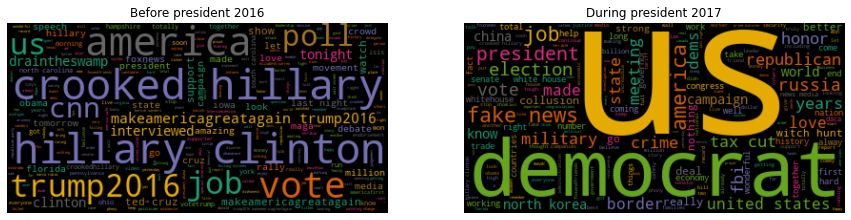

In [20]:
update_stop_words = STOPWORDS.union({'S','U','big','much','time','want','many','done','one','Trump',
                                     'back','said','see','need','great','people','thank','American',
                                    'must','don t', 'good', 'going','win','even','now','must','don',
                                     'today','join','new','will','never','country','year','better'
                                     'way','bad', 't','make','dem','way','thing','say','day'})

#text2016 = text2016.replace('will','')
text2017 = text2017.replace('don t','')
fig, axes = plt.subplots(1,2,squeeze=False,figsize=(15,15))

wordcloud2016 = WordCloud(max_words=400, background_color="black",
                          colormap='Dark2',random_state=72,
                          stopwords = update_stop_words,
                          max_font_size=200).generate(text2016)

wordcloud2017 = WordCloud(max_words=400, background_color="black",
                          colormap='Dark2',random_state=72,
                          stopwords = update_stop_words,
                          max_font_size=200).generate(text2017)

axes[0][0].imshow(wordcloud2016, interpolation='bilinear')
axes[0][1].imshow(wordcloud2017, interpolation='bilinear')
axes[0][0].title.set_text('Before president 2016')
axes[0][1].title.set_text('During president 2017')
#axes[0][0].axis("off")
#axes[0][0].title('2016 before president')
axes[0][0].axis('off')
axes[0][1].axis('off')
plt.show()

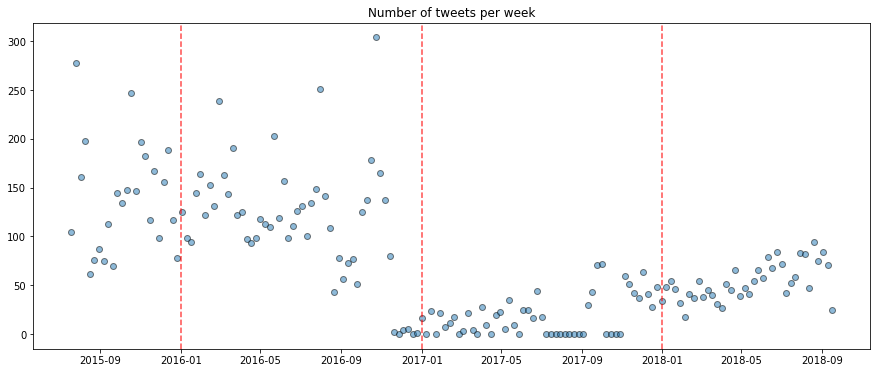

In [21]:
import numpy as np
import matplotlib.dates as mdates

df_merged['Date'] = pd.to_datetime(df_merged['Date'])
twts_day = df_merged.groupby(pd.Grouper(key='Date',freq='W')).count()['Text']
#twts_day.loc[twts_day.index >='2016-01-01' & twts_day.index <='201-01-01']
plt.figure(figsize=(15,6))
#plt.xticks(np.arange(min(twts_day), max(twts_day)+1, 1.0))

#ns.scatterplot(x=twts_day.index, y=twts_day.values, data=twts_day)
df_twts_day = pd.DataFrame({'date': twts_day.index,
                            'tweets': twts_day.values},
                            columns=['date','tweets'])

#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)

plt.scatter(x=df_twts_day['date'],y=df_twts_day['tweets'],alpha=0.5,edgecolor='black')

plt.axvline(x='2016-01-01',ls='--',color='red',alpha=0.7)
plt.axvline(x='2017-01-01',ls='--',color='red',alpha=0.7)
plt.axvline(x='2018-01-01',ls='--',color='red',alpha=0.7)
plt.title('Number of tweets per week')
plt.show()


In [22]:
pol = []
sub = []
for i, text in enumerate(test['Text']):
    pol.append(TextBlob(text).sentiment[0])
    sub.append(TextBlob(text).sentiment[1])


NameError: name 'test' is not defined

In [ ]:
df_sentiment = pd.DataFrame({'polarity':pol,
                         'subjectivity':sub})

# Concatenate the two dataframes into one
df = pd.concat([test,df_sentiment], axis=1)
df.sort_values(by='Date',inplace=True)
df.head()

In [ ]:
text2017 = df[(df['Date'] >='2017-01-01') & (df['Date'] >='2017-06-15')]['Text']
lst_text = []
lst_text.append(' '.join(text for text in text2017))

wordcloud = WordCloud(max_words=100, background_color="black",colormap='BuPu').generate(lst_text[0])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('2017 during president')
plt.show()


In [ ]:
df['date'] = df['Date']+' '+df['Time']
df['date'] = pd.to_datetime(df['date'])
df.info()

In [ ]:
df.drop(columns=['index'],inplace=True)

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
sentiment_week = df.groupby(pd.Grouper(key='date',freq='w')).mean()
sentiment_day = df.groupby(pd.Grouper(key='date',freq='d')).mean()

sentiment_day.plot(alpha=0.7, ax=ax1,figsize=(12,4))
sentiment_week.plot(alpha=0.7, ax=ax2)

In [ ]:
test = df1[df1['Date']=='2016-08-08'].copy()
for i in test['Text']:
    print(i)

#re.sub(r"(?<=\s(http.)).*?(?=\s)",'',test['Text'])
#test['Text'].replace("http.+",'',regex=True,inplace=True)
#test['Text'].replace("@\S*",'',regex=True,inplace=True)
#test['Text'].replace("[\n]",'',regex=True,inplace=True)
#test['Text']

In [ ]:
test['Text'][2235]

In [ ]:
df[df['Date']=='16-08-08']

In [ ]:
df1s = df1.sort_values(by=['Date','Time'])

In [ ]:
df1s[df1s['Date']=='2016-08-08']

In [ ]:
df[df['Date']<='16-05-22'] #2016-11 2015-07